# DEMO 3.2: **Decision Trees**
<u>Nội dung</u>:
1. Phân lớp IRIS
2. Phân lớp Social_Network_Ads  

<u>Cập nhật</u>: **04/2023**




---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [12]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Colab Notebooks/ML/Supervised Learning'

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
## Thư viện
import imageio
import joblib            as jlb
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import seaborn           as sbn

from IPython.display         import Image
from sklearn                 import tree
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier

---
## 1. **Phân lớp IRIS**
---

In [14]:
## Tập tin dữ liệu IRIS
data = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/ML/Supervised Learning/Data/Iris.xls')
print(data.head())

   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [15]:
## Các features: sepallength, sepalwidth, petallength, petalwidth
X = data.drop('iris', axis = 1)
X.head()

## Biến target: iris
y = data.iris

print(pd.concat([X, y], axis = 1).head())

   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [16]:
## Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [17]:
##------------------------------------------------------------------------------
## Xây dựng mô hình Decision Tree
##------------------------------------------------------------------------------
clf   = DecisionTreeClassifier()
model = clf.fit(X, y) # huấn luyện để tạo  mô hình

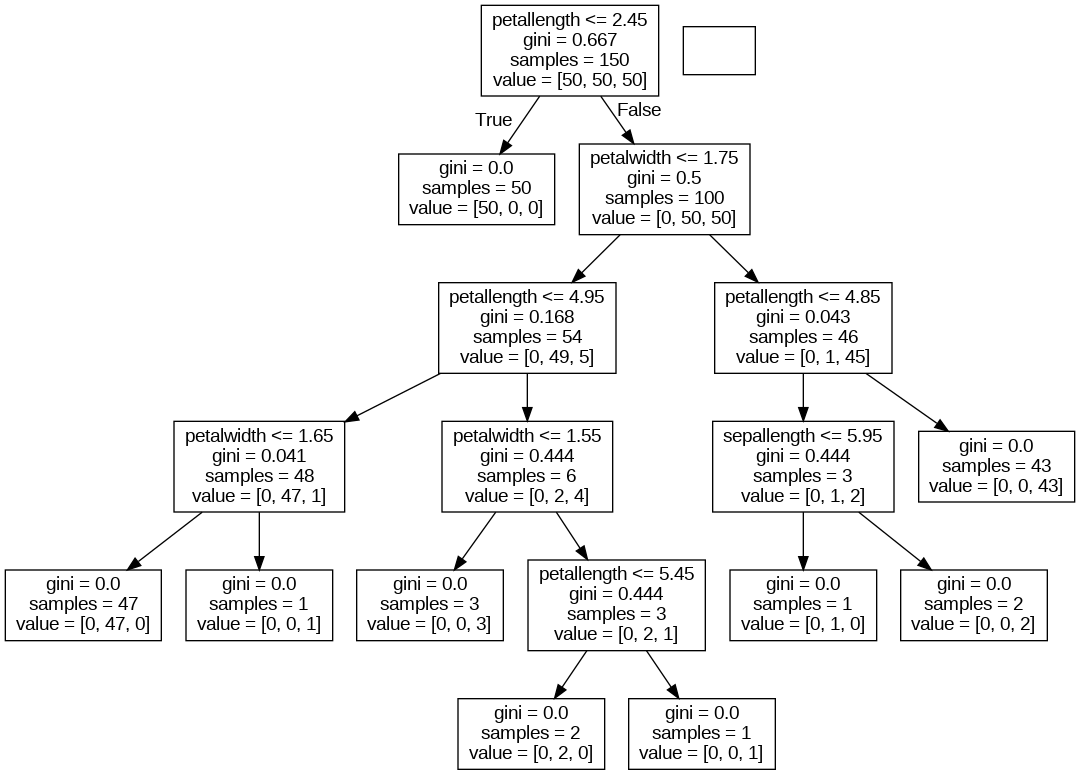

In [ ]:
## Biểu diễn cây quyết định
dcs_tree = tree.export_graphviz(clf, out_file = None, feature_names = X.columns)
graph    = pdp.graph_from_dot_data(dcs_tree)
Image(graph.create_png())

In [ ]:
## Lưu trữ cây quyết định vào file
graph.write_pdf(folder + "/Output/DecisionTree_Iris.pdf")
graph.write_png(folder + "/Output/DecisionTree_Iris.png")
with open(folder + "/Output/DecisionTree_Iris.txt", "w") as f:
    f = tree.export_graphviz(clf, out_file = f, feature_names = X.columns,
                                                class_names   = data.iris)
    print("Đã xuất file .TXT")

Đã xuất file .TXT


<ipython-input-12-84a380ba3b79>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  photo = imageio.imread(folder + "/Output/DecisionTree_Iris.png")


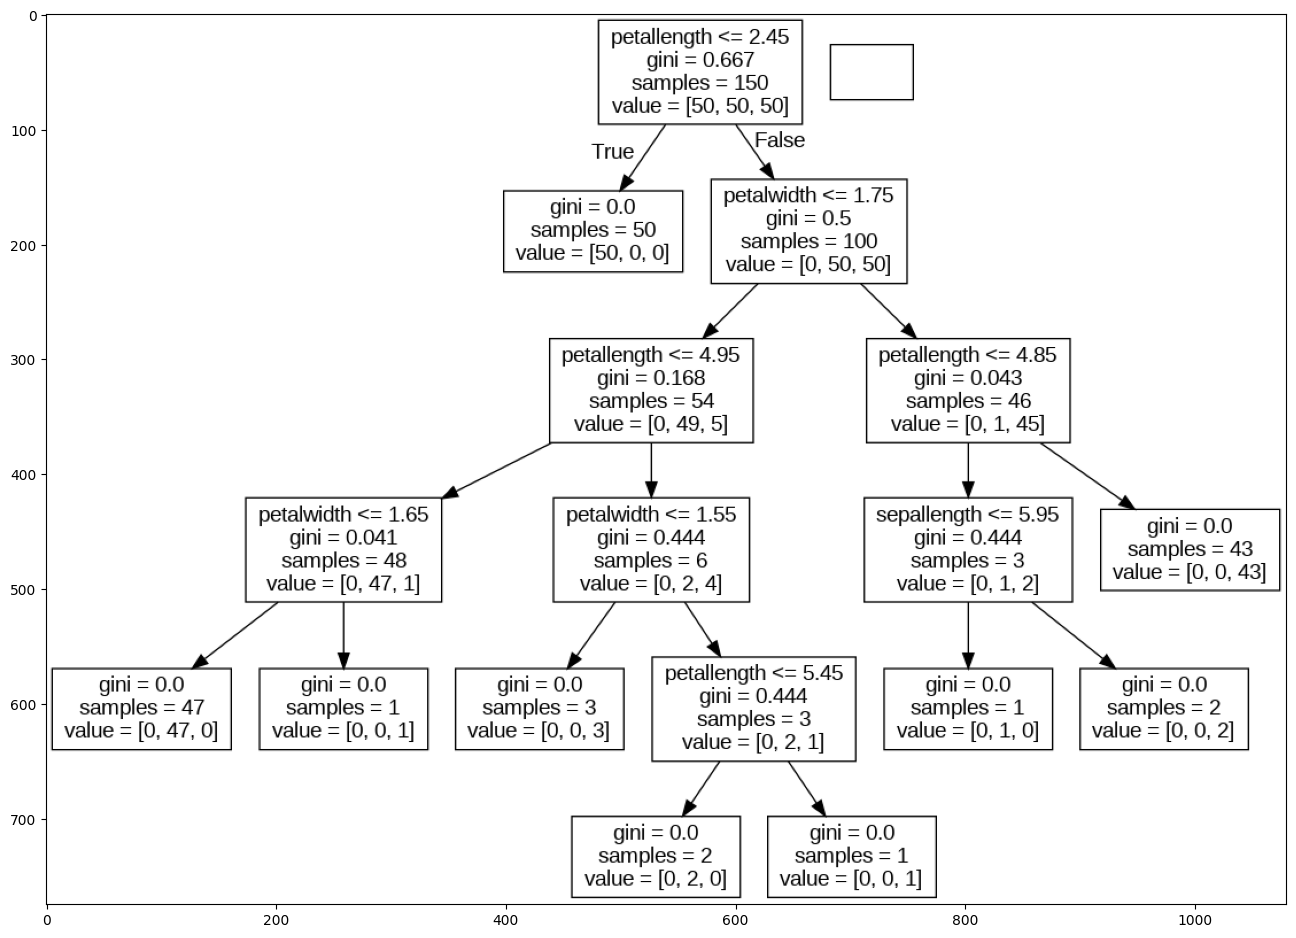

In [ ]:
## Xem lại cây quyết định
photo = imageio.imread(folder + "/Output/DecisionTree_Iris.png")
plt.figure(figsize = (16, 16))
plt.imshow(photo)
plt.show()

In [ ]:
## Lưu trữ mô hình để khai thác về sau
jlb.dump(model, folder + '/Output/DecisionTree_Iris.mdl')

['/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch03 - Supervised Learning/Output/DecisionTree_Iris.mdl']

In [ ]:
## Khai thác mô hình đã được huấn luyện để đoán (Test set)
model  = jlb.load(folder + '/Output/DecisionTree_Iris.mdl')

tiep = 'C'
while (tiep.upper() == 'C'):
    idx    = int(eval(input(f'Nhập chỉ số dòng từ 0 đến {X_test.shape[0]}: ')))
    idx    = idx % X_test.shape[0]
    X_new  = X_test[idx:idx + 1]
    y_pred = model.predict(X_new)
    print('Mẫu', X_new.to_string(), '    được dự đoán là', y_pred)
    tiep = input('Tiếp tục (C/K) ? ')

Nhập chỉ số dòng từ 0 đến 30: 11
Mẫu    sepallength  sepalwidth  petallength  petalwidth
5          5.4         3.9          1.7         0.4     được dự đoán là ['Iris-setosa']
Tiếp tục (C/K) ? c
Nhập chỉ số dòng từ 0 đến 30: 17
Mẫu     sepallength  sepalwidth  petallength  petalwidth
66          5.6         3.0          4.5         1.5     được dự đoán là ['Iris-versicolor']
Tiếp tục (C/K) ? k


---
## 2. **Phân lớp Social_Network_Ads**
---

In [29]:
## Tập tin dữ liệu Social_Network_Ads
data = pd.read_csv(folder + '/Data/Social_Network_Ads.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  EstimatedSalary_K  Purchased
0  15624510    Male   19            19000                 19          0
1  15810944    Male   35            20000                 20          0
2  15668575  Female   26            43000                 43          0
3  15603246  Female   27            57000                 57          0
4  15804002    Male   19            76000                 76          0


In [30]:
## Các features: Gender, Age, EstimatedSalary
x = data.drop(['User ID', 'EstimatedSalary_K', 'Purchased'], axis = 1)
x.head()

## Biến target: Purchased
y = data.Purchased

print(pd.concat([x, y], axis = 1).head())

   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0


In [31]:
#Chuyển Gender thành Numerical
sex = {'Male':1,'Female':0}
x['Male']=[sex[i] for i in data.Gender]
x = x.drop(['Gender'], axis = 1)

print(pd.concat([x,y],axis=1).head())

   Age  EstimatedSalary  Male  Purchased
0   19            19000     1          0
1   35            20000     1          0
2   26            43000     0          0
3   27            57000     0          0
4   19            76000     1          0


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)

In [33]:
clf = DecisionTreeClassifier()
model = clf.fit(x,y)

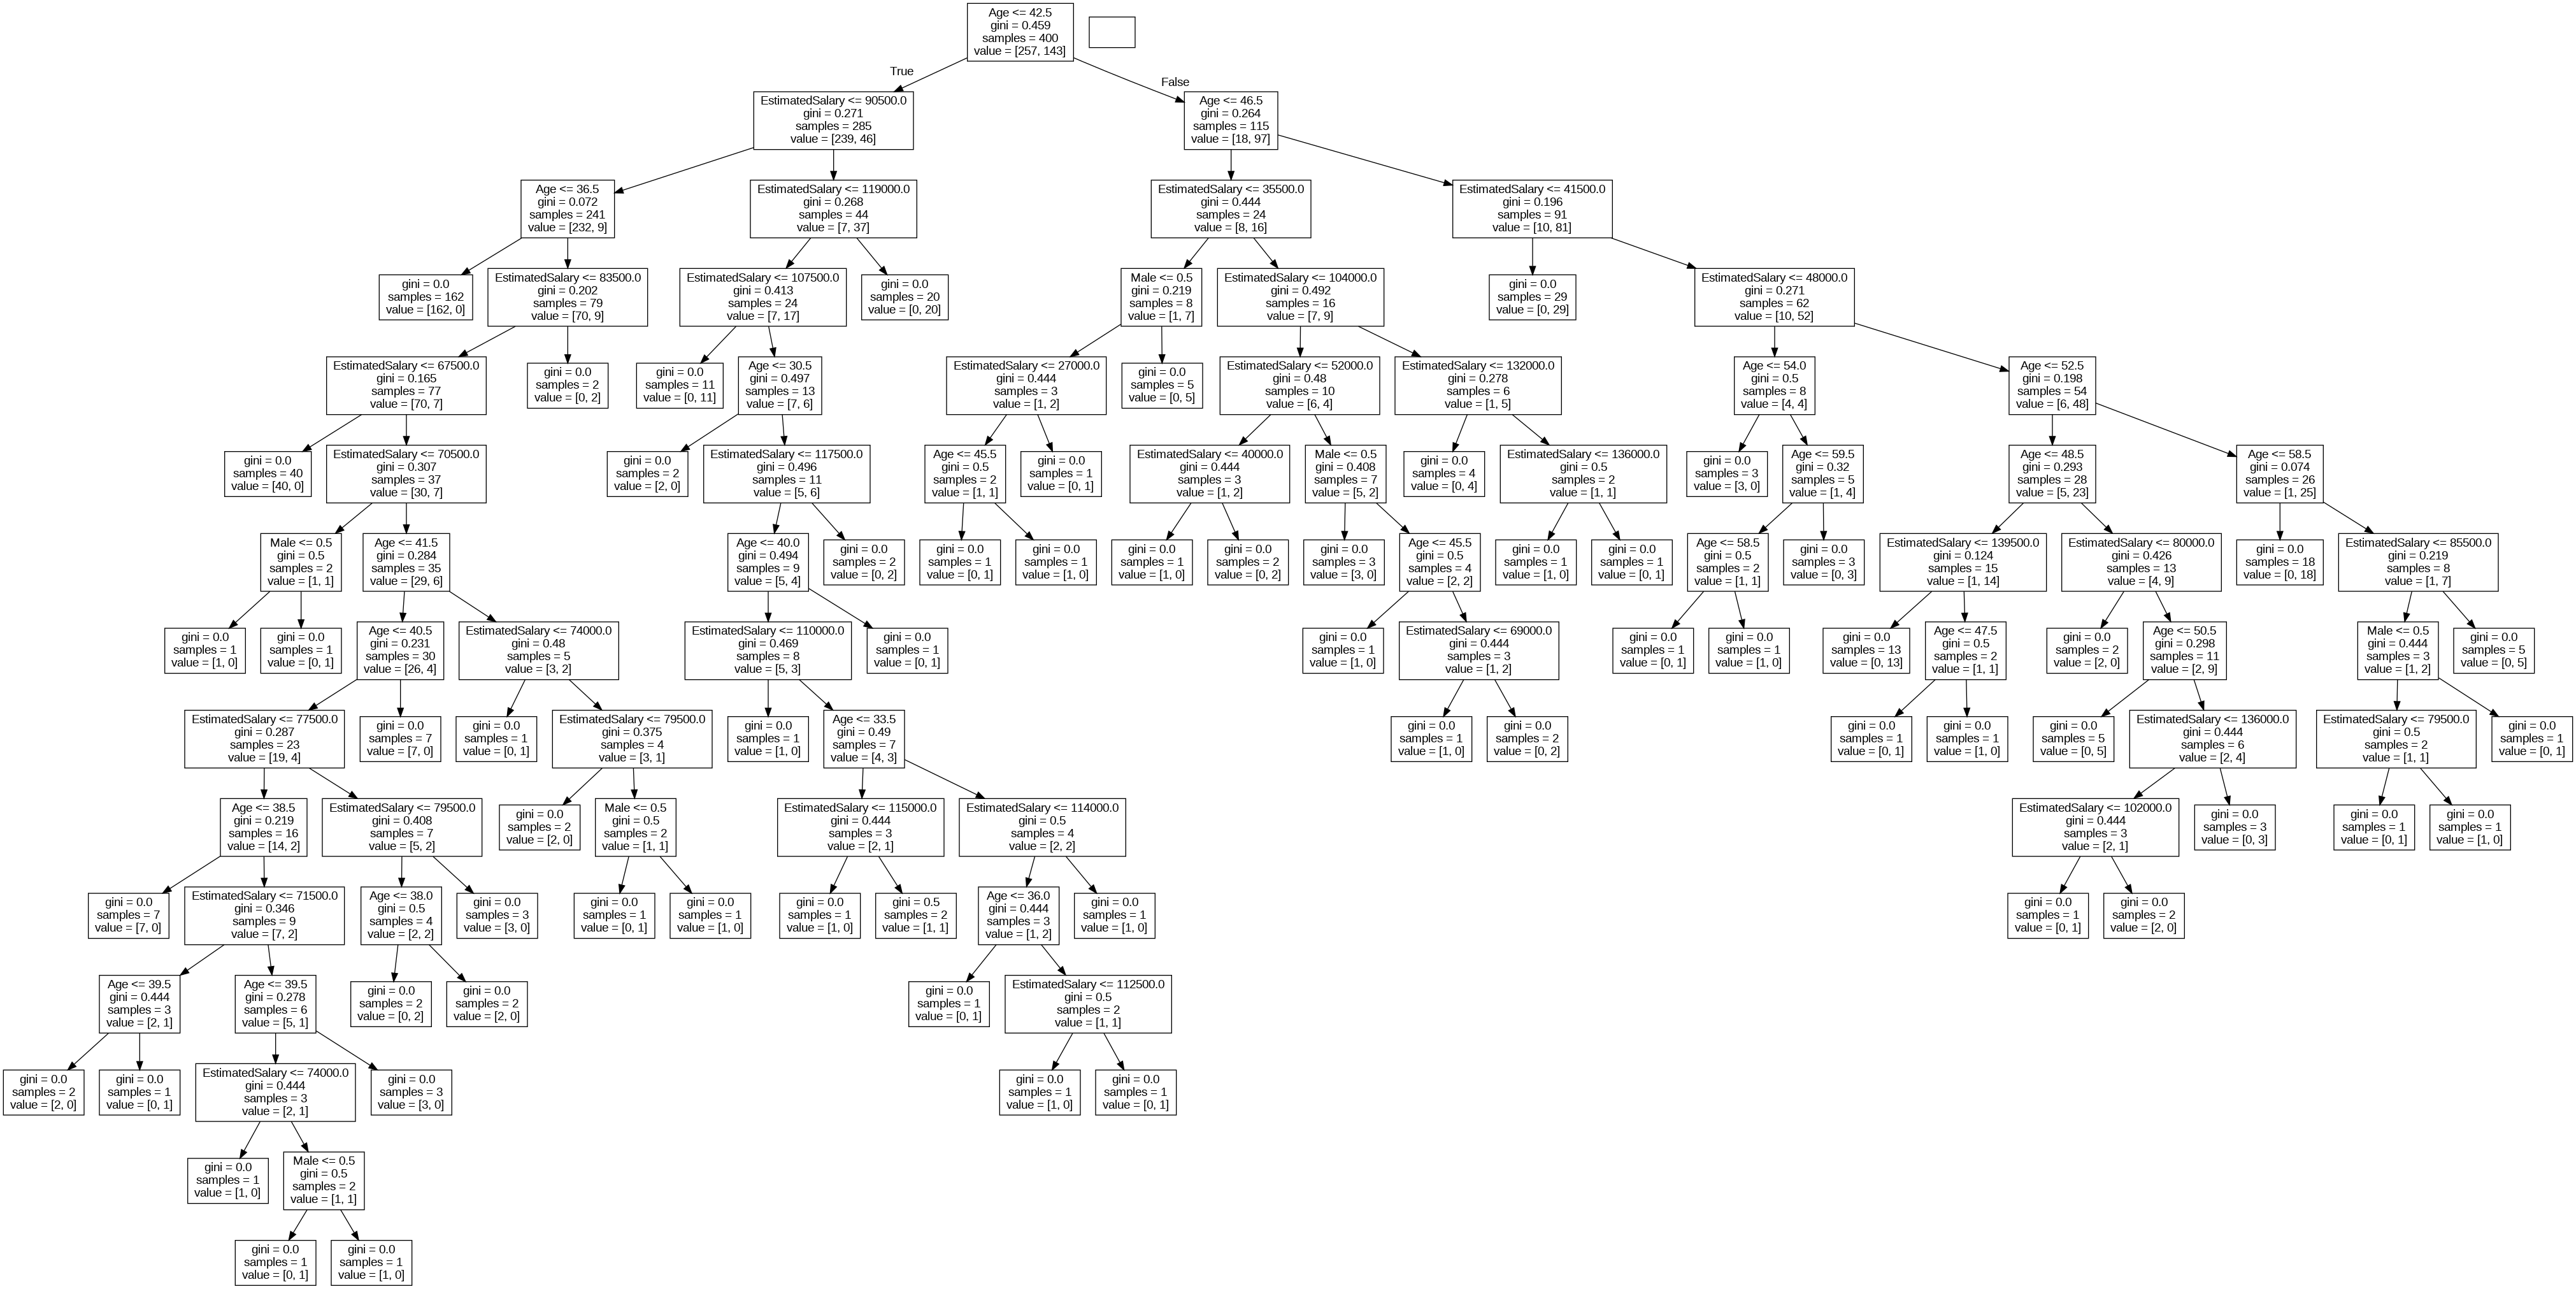

In [34]:
# Biểu diễn cây quyết định
decision_tree = tree.export_graphviz(clf, out_file=None, feature_names=x.columns)
graph = pdp.graph_from_dot_data(decision_tree)
Image(graph.create_png())

In [36]:
## Lưu trữ mô hình để khai thác sau
jlb.dump(model, folder + '/Data/Social_Network_Ads.mdl')

tiep = 'C'
while (tiep.upper()=='C'):
  idx = int(eval(input(f'Nhập chỉ số dòng từ 0 đến {x_test.shape[0]}: ')))
  idx = idx % x_test.shape[0]
  x_new = x_test[idx:idx+1]
  y_pred = model.predict(x_new)
  print('Mẫu',x_new.to_string(),'được dự đoán là',y_pred)
  tiep = input('Tiếp tục (C/K) ? ')


Nhập chỉ số dòng từ 0 đến 80: 46
Mẫu      Age  EstimatedSalary  Male
170   21            88000     1 được dự đoán là [0]
Tiếp tục (C/K) ? k
